In [1]:
import librosa
import librosa.display
import numpy as np
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt
import random
import json

# Klasyfikacja ML
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score

# Deep Learning (TensorFlow)
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout
from tensorflow.keras.optimizers import Adam


# Wizualizacja
import seaborn as sns


In [2]:
# Wczytanie zbioru nEMO
dataset = load_dataset("amu-cai/nEMO", split="train")

Mapowanie etykiet emocji:
  anger: 0
  fear: 1
  happiness: 2
  neutral: 3
  sadness: 4
  surprised: 5
Kształt danych X: (4481, 80, 200, 1)
Kształt danych y: (4481,)
Rozmiar zbioru treningowego: 3136 próbek
Rozmiar zbioru walidacyjnego: 672 próbek
Rozmiar zbioru testowego: 673 próbek

Rozkład klas w zbiorze treningowym:
  anger: 524 próbek
  fear: 515 próbek
  happiness: 524 próbek
  neutral: 566 próbek
  sadness: 538 próbek
  surprised: 469 próbek

Wagi klas:
  anger: 0.9975
  fear: 1.0149
  happiness: 0.9975
  neutral: 0.9234
  sadness: 0.9715
  surprised: 1.1144


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ batch_normalization_1                │ (None, 80, 200, 1)          │               4 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 80, 200, 32)         │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 40, 100, 32)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 40, 100, 32)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 40, 100, 64)         │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 20, 50, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 20, 50, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 20, 50, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 10, 25, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ (None, 10, 25, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d_1           │ (None, 128)                 │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_7 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 6)                   │             774 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 109,962 (429.54 KB)

 Trainable params: 109,960 (429.53 KB)

 Non-trainable params: 2 (8.00 B)

Epoch 1/20
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.1634 - loss: 1.8041
Epoch 1: val_accuracy improved from -inf to 0.18006, saving model to best_emotion_model.keras
98/98 ━━━━━━━━━━━━━━━━━━━━ 177s 2s/step - accuracy: 0.1634 - loss: 1.8040 - val_accuracy: 0.1801 - val_loss: 1.7913 - learning_rate: 0.0010
Epoch 2/20
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.1724 - loss: 1.7932
Epoch 2: val_accuracy did not improve from 0.18006
98/98 ━━━━━━━━━━━━━━━━━━━━ 162s 2s/step - accuracy: 0.1723 - loss: 1.7932 - val_accuracy: 0.1801 - val_loss: 1.7894 - learning_rate: 0.0010
Epoch 3/20
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.1934 - loss: 1.7871
Epoch 3: val_accuracy improved from 0.18006 to 0.20089, saving model to best_emotion_model.keras
98/98 ━━━━━━━━━━━━━━━━━━━━ 153s 2s/step - accuracy: 0.1933 - loss: 1.7871 - val_accuracy: 0.2009 - val_loss: 1.7840 - learning_rate: 0.0010
Epoch 4/20
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.1651 - loss: 1.7956
Epoch 

C:\Users\Dell\anaconda3\envs\emocje_dl\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Dell\anaconda3\envs\emocje_dl\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Dell\anaconda3\envs\emocje_dl\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result)

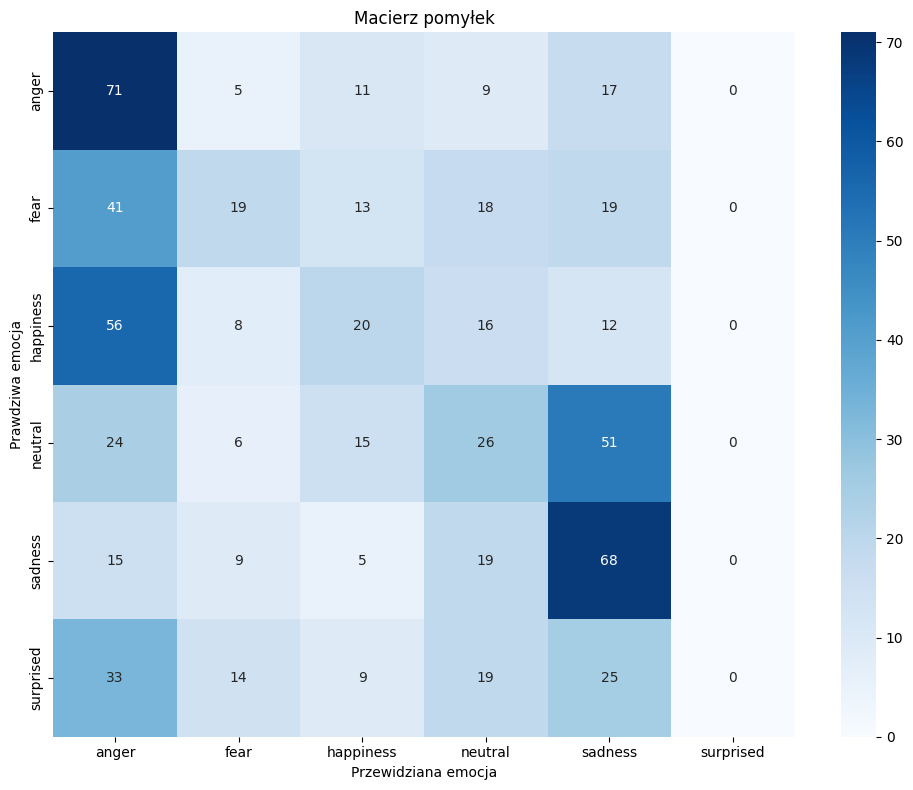

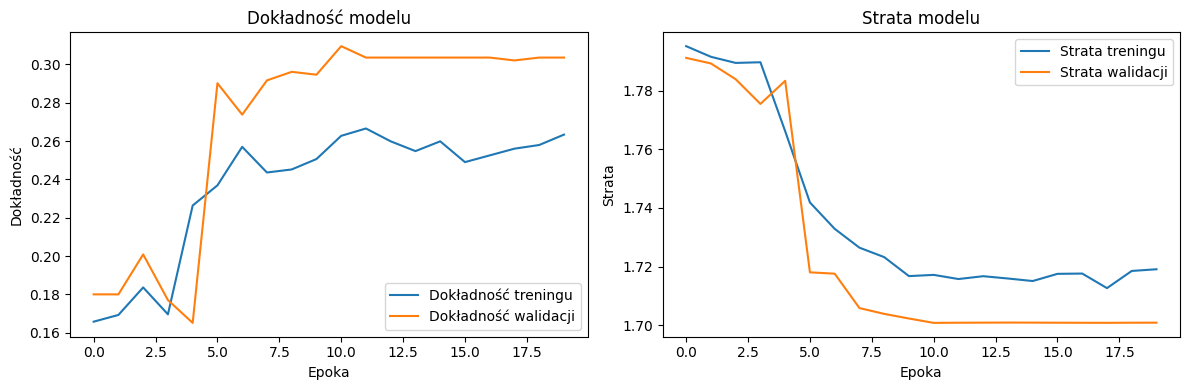

Zapisano mapowanie etykiet do pliku emotion_labels.json


In [4]:
# Funkcja przetwarzania audio na spektrogramy Mel'a
def audio_to_mel_spectrogram(audio_array, sr=24000):
    n_fft = 1024
    hop_length = 256
    audio_array = audio_array / (np.max(np.abs(audio_array)) + 1e-10)
    pre_emphasis = np.append(audio_array[0], audio_array[1:] - 0.97 * audio_array[:-1])
    
    mel_spec = librosa.feature.melspectrogram(
        y=pre_emphasis,
        sr=sr,
        n_mels=80,
        n_fft=n_fft,
        hop_length=hop_length,
        power=2.0,
        fmax=8000
    )
    
    mel_spec_db = librosa.power_to_db(mel_spec, ref=np.max, top_db=80)
    mel_spec_norm = (mel_spec_db - np.min(mel_spec_db)) / (np.max(mel_spec_db) - np.min(mel_spec_db) + 1e-10)
    return mel_spec_norm

# Przygotowanie danych
audio_files = [sample['audio']['array'] for sample in dataset]
sample_rates = [sample['audio']['sampling_rate'] for sample in dataset]
labels = [sample['emotion'] for sample in dataset]

# Konwertowanie etykiet emocji na liczby
emotion_labels = {emotion: idx for idx, emotion in enumerate(sorted(set(labels)))}
numeric_labels = [emotion_labels[label] for label in labels]

print("Mapowanie etykiet emocji:")
for emotion, idx in emotion_labels.items():
    print(f"  {emotion}: {idx}")

# Przetwarzanie i augmentacja audio
processed_spectrograms = []
for audio, sr in zip(audio_files, sample_rates):
    max_len = 5 * sr
    if len(audio) > max_len:
        start = np.random.randint(0, len(audio) - max_len)
        audio = audio[start:start + max_len]
    else:
        padding = np.zeros(max_len - len(audio))
        audio = np.concatenate([audio, padding])
    
    mel_spec = audio_to_mel_spectrogram(audio, sr=sr)
    processed_spectrograms.append(mel_spec)

# Docelowy rozmiar spektrogramu
target_size = (80, 200)

# Zmiana rozmiaru spektrogramów
resized_spectrograms = []
for spec in processed_spectrograms:
    spec = tf.convert_to_tensor(spec, dtype=tf.float32)
    spec = tf.expand_dims(spec, axis=-1)
    resized = tf.image.resize(spec, target_size)
    resized_spectrograms.append(tf.squeeze(resized).numpy())

# Konwersja na numpy arrays
X = np.array(resized_spectrograms)
y = np.array(numeric_labels).astype('int32')

# Zmiana kształtu na (samples, height, width, 1)
X = X.reshape(-1, target_size[0], target_size[1], 1)

# Wyświetlanie informacji o kształcie danych
print(f"Kształt danych X: {X.shape}")
print(f"Kształt danych y: {y.shape}")


# Podział na zbiory treningowy, walidacyjny i testowy
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)

print(f"Rozmiar zbioru treningowego: {X_train.shape[0]} próbek")
print(f"Rozmiar zbioru walidacyjnego: {X_val.shape[0]} próbek")
print(f"Rozmiar zbioru testowego: {X_test.shape[0]} próbek")

# Wyświetl rozkład klas w zbiorze treningowym
class_counts = np.bincount(y_train)
print("\nRozkład klas w zbiorze treningowym:")
for label, count in enumerate(class_counts):
    emotion = [k for k, v in emotion_labels.items() if v == label][0]
    print(f"  {emotion}: {count} próbek")


# Obliczenie wag klas dla zrównoważenia
# Im mniejsza liczba próbek, tym większa waga
class_counts = np.bincount(y_train)
class_weights = {}
total_samples = len(y_train)
n_classes = len(emotion_labels)
for label, count in enumerate(class_counts):
    # Obliczanie wagi odwrotnie proporcjonalnej do częstości występowania klasy
    class_weights[label] = total_samples / (n_classes * count)


print("\nWagi klas:")
for label, weight in class_weights.items():
    emotion = [k for k, v in emotion_labels.items() if v == label][0]
    print(f"  {emotion}: {weight:.4f}")


model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(80, 200, 1)),
    tf.keras.layers.BatchNormalization(),
    
    
    tf.keras.layers.Conv2D(32, (3, 3), padding='same', activation='relu'),
    tf.keras.layers.MaxPool2D((2, 2)),
    tf.keras.layers.Dropout(0.3),
    
    tf.keras.layers.Conv2D(64, (3, 3), padding='same', activation='relu'),
    tf.keras.layers.MaxPool2D((2, 2)),
    tf.keras.layers.Dropout(0.4),
    
    tf.keras.layers.Conv2D(128, (3, 3), padding='same', activation='relu'),
    tf.keras.layers.MaxPool2D((2, 2)),
    tf.keras.layers.Dropout(0.5),
    
    # Warstwa GlobalAveragePooling2D do ekstrakcji globalnych cech
    tf.keras.layers.GlobalAveragePooling2D(),
    
    # Warstwa gęsta 
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    
    # Wyjście z softmax, aby przewidzieć prawdopodobieństwo emocji
    tf.keras.layers.Dense(len(emotion_labels), activation='softmax')
])

# Kompilacja modelu
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Podsumowanie modelu
model.summary()

# Funkcja zmieniająca współczynnik uczenia w zależności od epoki
def lr_scheduler(epoch, lr):
    if epoch < 5:
        return lr
    elif epoch < 10:
        return lr * 0.5
    elif epoch < 15:
        return lr * 0.25
    else:
        return lr * 0.1

# Callbacki do monitorowania treningu
callbacks = [
    tf.keras.callbacks.LearningRateScheduler(lr_scheduler),
    tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=12, restore_best_weights=True, verbose=1),
    tf.keras.callbacks.ModelCheckpoint('best_emotion_model.keras', monitor='val_accuracy', save_best_only=True, verbose=1)
]

# Trening modelu
history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=20,
    batch_size=32,
    callbacks=callbacks,
    class_weight=class_weights,
    verbose=1
)

# Ładowanie najlepszego modelu
try:
    best_model = tf.keras.models.load_model('best_emotion_model.keras')
    print("Wczytano najlepszy model z pliku best_emotion_model.keras")
except:
    best_model = model
    print("Używamy modelu z końca treningu")

# Ocena modelu na zbiorze testowym
test_loss, test_acc = best_model.evaluate(X_test, y_test, verbose=1)
print(f"\nDokładność na zbiorze testowym: {test_acc:.4f}")

# Predykcja na zbiorze testowym
y_pred = best_model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# Raport klasyfikacji
print("\nRaport klasyfikacji:")
print(classification_report(y_test, y_pred_classes))

# Macierz pomyłek
cm = confusion_matrix(y_test, y_pred_classes)
print("\nMacierz pomyłek:")
print(cm)

# Obliczanie F1-score
f1_macro = f1_score(y_test, y_pred_classes, average='macro')
print(f"\nMacro F1-score: {f1_macro:.4f}")

# Wykresy
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=[k for k in emotion_labels.keys()],
            yticklabels=[k for k in emotion_labels.keys()])
plt.xlabel('Przewidziana emocja')
plt.ylabel('Prawdziwa emocja')
plt.title('Macierz pomyłek')
plt.tight_layout()
plt.savefig('confusion_matrix.png')
plt.show()

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Dokładność treningu')
plt.plot(history.history['val_accuracy'], label='Dokładność walidacji')
plt.title('Dokładność modelu')
plt.xlabel('Epoka')
plt.ylabel('Dokładność')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Strata treningu')
plt.plot(history.history['val_loss'], label='Strata walidacji')
plt.title('Strata modelu')
plt.xlabel('Epoka')
plt.ylabel('Strata')
plt.legend()

plt.tight_layout()
plt.savefig('training_history.png')
plt.show()

# Zapisanie mapowania etykiet
with open('emotion_labels.json', 'w') as f:
    json.dump(emotion_labels, f)
print(f"Zapisano mapowanie etykiet do pliku emotion_labels.json")


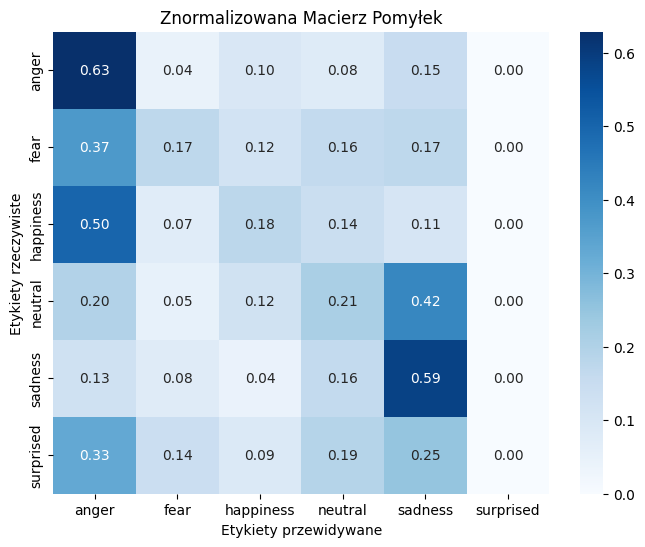

In [10]:
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

# Rysowanie macierzy pomyłek
plt.figure(figsize=(8, 6))
sns.heatmap(cm_normalized, annot=True, fmt='.2f', cmap='Blues', xticklabels=emotion_labels, yticklabels=emotion_labels)
plt.xlabel('Etykiety przewidywane')
plt.ylabel('Etykiety rzeczywiste')
plt.title('Znormalizowana Macierz Pomyłek')
plt.savefig('normalized_confusion_matrix.png', format='png', dpi=300)
plt.show()